# Exercise 7.2: Detecting periodicity


In the on-line resources there is a file called sunspots.txt, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first representing the month and the second being the sunspot number.





In [50]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('coolwarm')
sns.set_style('whitegrid')
%matplotlib inline


# a) Write a program that reads the data in the file and makes a graph of sunspots as a function of time. You should see that the number of sunspots has fluctuated on a regular cycle for as long as observations have been recorded. Make an estimate of the length of the cycle in months.


Text(0.5, 0, 'Months')

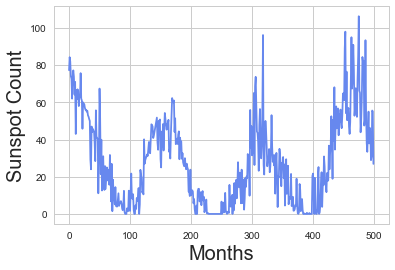

In [51]:
data = np.loadtxt('../dat/sunspots.txt',float)
y = data[:,1]
plt.plot(y[500:1000])
plt.ylabel("Sunspot Count",fontsize=20)
plt.xlabel('Months',fontsize=20)

In [52]:
150/12

12.5

Interpreting this graph, we can infer that the length of a sunspot cycle is approximately every 150 months, or about every 12.5 years. Upon researching the problem it turns out to be every 11 years, but not a bad first guess! Now we can use fourier analysis to more quantitatively explore this question. 

# b) Modify your program to calculate the Fourier transform of the sunspot data and then make a graph of the magnitude squared |ck|2 of the Fourier coefficients as a function of k—also called the power spectrum of the sunspot signal. You should see that there is a noticeable peak in the power spectrum at a nonzero value of k. The appearance of this peak tells us that there is one frequency in the Fourier series that has a higher amplitude than the others around it—meaning that there is a large sine-wave term with this frequency, which corresponds to the periodic wave you can see in the original data.


In [65]:

def DFT(x):
    """
    Compute the discrete Fourier Transform of the 1D array x
    :param x: (array)
    
    This form of the dft still contains the nyquist frequency
    """

    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

def dft(y):
    """
    This is the discrete fourier transform. 
    """
    N = len(y) #we create the interval as the length of the dataset.. 
    
    
    c = np.zeros(N//2+1,complex) #intialize the number of possible c values, which is a complex number of half the lenght
    #of the interval. 

    for k in range(N//2+1): #for each k value, this is the sum of each value N/2, to avoid the Nyquist limit, and just multiply by 2. 
        for n in range(N): #compute fourier coefficient as the sum from 0  to N of the FT. 
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

In [66]:
c1 = dft(y)
c2 = DFT(y)

ValueError: shapes (1572,1572) and (3143,) not aligned: 1572 (dim 1) != 3143 (dim 0)

In [ ]:
power1 = np.real(c1)**2 + np.imag(c1)**2

power2 = np.real(c2)**2 + np.imag(c2)**2

In [ ]:
#plt.plot(power1) #k is just the index number. 
plt.title("With Nyquist Frequency",fontsize=20)
plt.plot(power2) #k is just the index number. 

plt.ylabel("Power Specture $|c(k)|^2$",fontsize=20)
plt.xlabel('$k$',fontsize=20)
#plt.xscale('log')

In [49]:

#it's somwhere between 10 and 100, midway between, which is approx

10**1.5

31.622776601683793

# c) Find the approximate value of k to which the peak corresponds. What is the period of the sine wave with this value of k? You should find that the period corresponds roughly to the length of the cycle that you estimated in part (a). This kind of Fourier analysis is a sensitive method for detecting periodicity in signals. Even in cases where it is not clear to the eye that there is a periodic component to a signal, it may still be possible to find one using a Fourier transform.


In [31]:
def ift(ck):

array([ 58. ,  62.6,  70. , ...,  25.2,  23.5,  21.6])